# 3. Teil - Visualisierung

In [1]:
#Bibs laden
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Datensatz laden
df_crowd = pd.read_csv('./crowdfunding_after_preprocessing.csv')

In [3]:
df_crowd.head(2)

,Unnamed: 0,funded_amount,loan_amount,activity,sector,use,country_code,country,region,term_in_months,lender_count,borrower_genders,repayment_interval,goal_reached,borrower_female,borrower_male
0,0,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,12,12,female,irregular,reached,1,0
1,1,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,11,14,female,irregular,reached,2,0


In [4]:
#Spalte Unamed 0: kann weg
df_crowd.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
df_crowd.head(2)

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,term_in_months,lender_count,borrower_genders,repayment_interval,goal_reached,borrower_female,borrower_male
0,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,12,12,female,irregular,reached,1,0
1,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,11,14,female,irregular,reached,2,0


## Geschlechterverteilung der Darlehensnehmer
Wie ist der Anteil Frauen und Männer an den Darlehensnehmern?

In [6]:
#Wir brauchen nur die Spalten "borrower_genders", "borrower_male", "borrower_female"
#Später eventuell die Spalten "funded_amount" und "loan_amount", "sector"
df_gender = df_crowd.drop(columns=["activity", "use", "country_code", "country", "region", "term_in_months", "repayment_interval", "goal_reached"])
df_gender.head(3)

,funded_amount,loan_amount,sector,lender_count,borrower_genders,borrower_female,borrower_male
0,300,300,Food,12,female,1,0
1,575,575,Transportation,14,female,2,0
2,150,150,Transportation,6,female,1,0


In [7]:
#Wir fügen noch eine Spalte Geschlechter Verhältnis hinzu und das in Kategorien einteilen
df_gender["female_percent"] = 100 * (df_gender["borrower_female"] / (df_gender["borrower_female"] + df_gender["borrower_male"]))

labels = ["0-20%","20-40%","40-60%","60-80%","80-100%"]
bins = [-1,20.0,40.0,60.0,80.0,100.0]
df_gender["female_percent_category"] = pd.cut(df_gender["female_percent"], bins=bins, labels=labels)

In [8]:
df_gender.head(3)

,funded_amount,loan_amount,sector,lender_count,borrower_genders,borrower_female,borrower_male,female_percent,female_percent_category
0,300,300,Food,12,female,1,0,100.0,80-100%
1,575,575,Transportation,14,female,2,0,100.0,80-100%
2,150,150,Transportation,6,female,1,0,100.0,80-100%


In [9]:
#Gender in den Gruppen gruppieren
gender_pie = df_gender.groupby("borrower_genders").size()
gender_pie

borrower_genders
female    488081
male      138523
mixed      40380
dtype: int64

In [10]:
#Nur Mixedgruppen auswählen und nach female_perect_category gruppieren
df_mixed = df_gender.loc[df_gender["borrower_genders"] == "mixed"].groupby("female_percent_category").size()
#In Prozent
df_mixed = 100 * (df_mixed / df_mixed.sum())
df_mixed

female_percent_category
0-20%       3.407628
20-40%     12.999009
40-60%     26.901932
60-80%     37.894998
80-100%    18.796434
dtype: float64

In [11]:
df_mixed.sum()

100.0

In [12]:
#Extra Bibliothek für Plot
from matplotlib.patches import ConnectionPatch

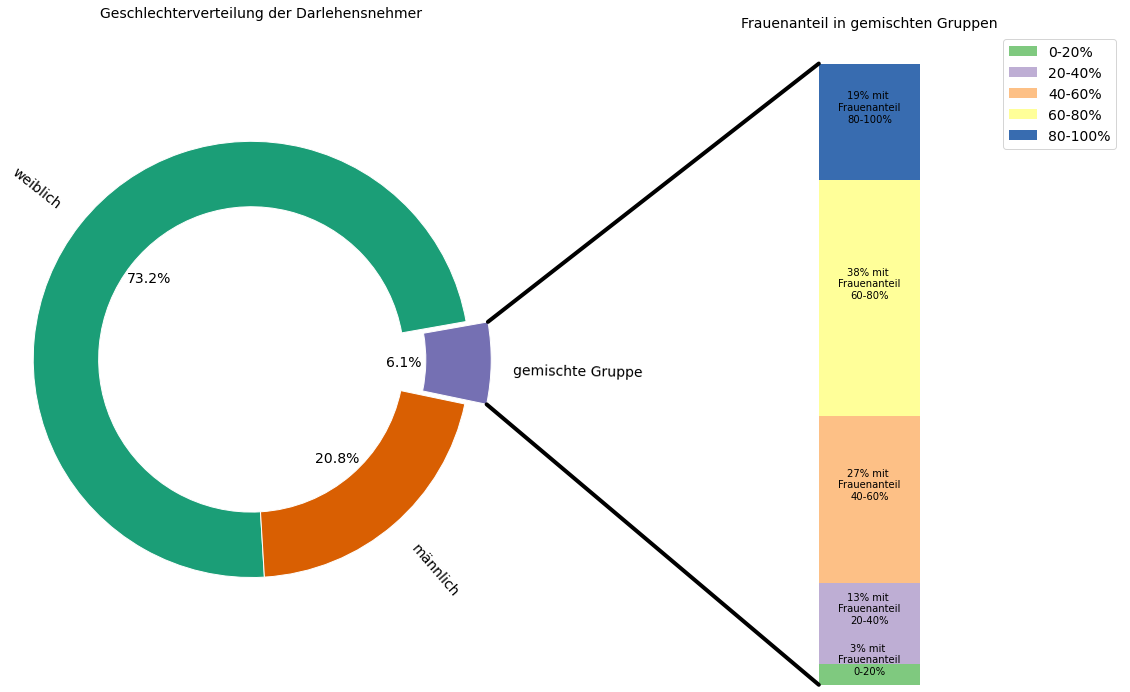

In [13]:
#Plot mit zwei Subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 12))


#Pie Plot
#Label, Labelgröße und Explode festlegen
label = ["weiblich", "männlich", "gemischte Gruppe"]
sizes = gender_pie
explode = [0, 0, 0.1]

#Colormap auswählen und benötigte Anzahl Farben aus der Colormap unseren Farben zuweisen
cmap = plt.get_cmap("Dark2")
color = cmap(np.arange(len(sizes)))

ax[0].pie(sizes, #Werte
        labels=label, #Label
        autopct='%1.1f%%', #Darstellung der Zahlen
        startangle=10, #Startwinkel
        counterclock=True, #Im Gegenuhrzeigersinn zeichnen?
        rotatelabels=True, #Schrift rotieren
        explode=explode, #Explode
        colors=color, #Farben
        wedgeprops=dict(width=0.3, edgecolor='w'), #Macht den Donut
        textprops={'fontsize': 14})

#Titel
ax[0].axis('equal')
title_str = 'Geschlechterverteilung der Darlehensnehmer'
ax[0].set_title(title_str, size=14, pad=15)



#Barplot
xpos = 0
bottom = 0
data = df_mixed
width =0.01
cmap = plt.get_cmap("Accent")
colors = cmap(np.arange(len(data)))

#Barplot zeichnen
for j, value in enumerate(data):
    height = value
    ax[1].bar(xpos, height, width, bottom=bottom, color=colors[j], label=df_mixed.index[j]) #Plot
    ypos = bottom + ax[1].patches[j].get_height() / 2
    bottom += height #Offset für Stackedbar
    ax[1].text(xpos, ypos, "{0:.0f}% mit \nFrauenanteil\n{1:}".format(value, df_mixed.index[j]), ha='center') #Text in Plot


#Titel und Legende
title_str = 'Frauenanteil in gemischten Gruppen'
ax[1].set_title(title_str, size=14, pad=5)
ax[1].legend(loc="upper right", prop={'size': 14})
ax[1].axis('off')
ax[1].set_xlim(- 2.5 * width, 2.5 * width) #Plot verkleinern


#Verbindungslinien
#Aus Connecting Patches Punkte festlegen
theta1 = ax[0].patches[0].theta1
theta2 = ax[0].patches[1].theta2
center = ax[0].patches[2].center
r = ax[0].patches[0].r
bar_height = sum([item.get_height() for item in ax[1].patches])

# Obere Linie Zeichnen
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                      coordsA="data", coordsB="data", axesA=ax[1], axesB=ax[0])
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax[1].add_artist(con)

# Untere Linie zeichnen
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                      coordsB="data", axesA=ax[1], axesB=ax[0])

#Farbe festlegen
con.set_color([0, 0, 0])
ax[1].add_artist(con)
con.set_linewidth(4)

plt.show()

Erkenntnis:
- In Untersuchter Crowdfundingplattform haben Frauen eindeutig den größten Anteil an den Darlehensnehmern
- Reine Frauengruppen (oder Einzelpersonen) machen 73,2% aller Darlehen aus
- Reine Männergruppen (oder Einzelpersonen) 20,8%
- Gemischte Gruppen 6,1%
- In den gemischten Gruppen hat mehr als die Hälfte der einen Frauenanteil von > 50%

## Gefragte Darlehensbeträge nach Geschlecht und Gruppenzusammensetzung
Hängt der gefragte Betrag und die Anzahl der Geldgeber vom Geschlecht ab?

In [14]:
df_gender.head(3)

,funded_amount,loan_amount,sector,lender_count,borrower_genders,borrower_female,borrower_male,female_percent,female_percent_category
0,300,300,Food,12,female,1,0,100.0,80-100%
1,575,575,Transportation,14,female,2,0,100.0,80-100%
2,150,150,Transportation,6,female,1,0,100.0,80-100%


In [15]:
#Mal Unterschied schauen zwischen Median von gewünschtem Darlehen und Median von Erzieltem Darlehen
df_gender["funded_amount"].median() / df_gender["loan_amount"].median()

0.9

Der Unterschied beträgt 10% für die nachfolgende Betrachtungen gehen wir von dem gewünschten Darlehen aus. Dadurch wird nicht der Erfolg sondern die geplanten Ziele in den Fokus gerückt. Erfolg nach Geschlecht wäre sicher auch interessant

In [16]:
#Nochmal nur mixed Gruppen anschauen
df_mixed = df_gender.loc[(df_gender["borrower_genders"] == 'mixed')]

In [17]:
#Nur einzel Gruppen
df_gender_single = df_gender.loc[((df_gender["borrower_female"] == 1) & (df_gender["borrower_male"] == 0) |
                                 (df_gender["borrower_female"] == 0) & (df_gender["borrower_male"] == 1))]

In [18]:
#Seaborn FontScaling
sns.set(font_scale=1.5)

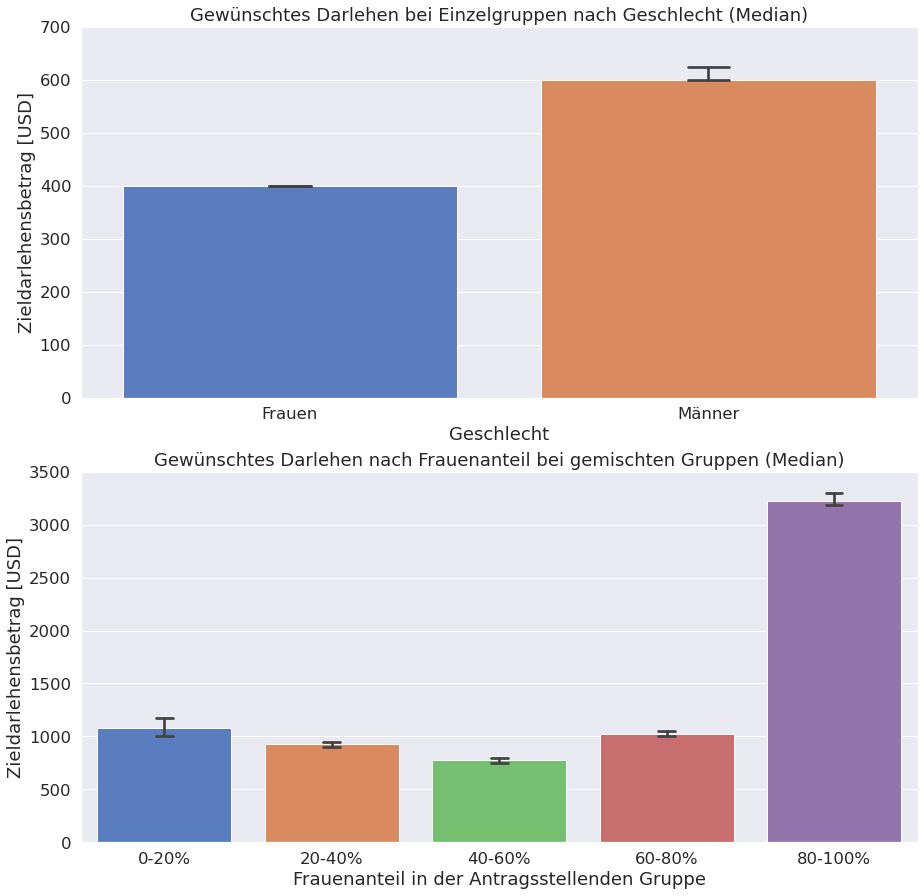

In [40]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,15))

#Gewünschtes Darlehen
bar1 = sns.barplot(data=df_gender_single,
            x="borrower_genders",
            y="loan_amount",
            ax=ax[0], 
            estimator=np.median, #Mit Median rechnen wegen Ausreißer
            capsize=0.1,
            palette="muted")

#Eigenschaften ändern
bar1.set(ylim=(0,700),
        xlabel="Geschlecht", #Bezeichnung x-Achse
        ylabel="Zieldarlehensbetrag [USD]", #Bezeichnung y-Achse
        title="Gewünschtes Darlehen bei Einzelgruppen nach Geschlecht (Median)"); #Titel
bar1.set_xticklabels(labels=["Frauen", "Männer"])

#Vergleich nur gemischte Gruppen
bar2 = sns.barplot(data=df_mixed,
            x="female_percent_category",
            y="loan_amount",
            ax=ax[1], 
            estimator=np.median, #Mit Median rechnen wegen Ausreißer
            capsize=0.1,
            palette="muted")

#Eigenschaften ändern
bar2.set(ylim=(0,3500),
        xlabel="Frauenanteil in der Antragsstellenden Gruppe", #Bezeichnung x-Achse
        ylabel="Zieldarlehensbetrag [USD]", #Bezeichnung y-Achse
        title="Gewünschtes Darlehen nach Frauenanteil bei gemischten Gruppen (Median)"); #Titel



Erkenntnis:
- Einzelpersonen haben deutlich kleinere Zielbeträge als Gruppen
- Männer haben höhere Zielbeträge als Frauen (400USD zu 600USD)
- Fast reine Männergruppen haben leicht höhere Zielbeträge als gleichmässig gemischte Gruppen
- Gruppen mit einem hohen Frauenanteil > 80% haben deutlich höhere Zielbeträge (3200USD zu ~1000USD)
- Es handelt sich hier nicht um reine Männer und Frauengruppen

In [83]:
len(df_gender.loc[(df_gender["borrower_genders"] == 'mixed') & (df_gender["female_percent_category"] == '80-100%')])

7590

## Sektoren nach Geschlecht
Hängen Geschlecht, Sektor und Darlehensziele miteinander zusammen?
- Darlehensziele und erreichtes Darlehen pro Person rechnen --> minimiert Einfluss von Gruppen
- Anzahl der Antragsteller in Prozent errechnen

In [20]:
#Loan Amount und Funded Amount auf die Anzahl der Gruppenmitglieder herunterrechnen
df_per_person = df_gender.copy()
df_per_person["loan_amount"] = df_per_person["loan_amount"] / (df_per_person["borrower_female"] + df_per_person["borrower_male"])
df_per_person["funded_amount"] = df_per_person["funded_amount"] / (df_per_person["borrower_female"] + df_per_person["borrower_male"])

In [21]:
df_per_person.head(3)

,funded_amount,loan_amount,sector,lender_count,borrower_genders,borrower_female,borrower_male,female_percent,female_percent_category
0,300.0,300.0,Food,12,female,1,0,100.0,80-100%
1,287.5,287.5,Transportation,14,female,2,0,100.0,80-100%
2,150.0,150.0,Transportation,6,female,1,0,100.0,80-100%


In [22]:
#Nach sector und Frauenanteil gruppieren, median von loan_amount nutzen
df_per_person_pivot = df_per_person.groupby(["sector", "female_percent_category"],as_index=False).agg({"loan_amount":"median"})
#Pivottabelle
df_per_person_pivot = df_per_person_pivot.pivot("sector", "female_percent_category", "loan_amount")

In [23]:
#Spalte Alle für ganzen Sector hinzufügen
#Hier als Kategorie hinzufügen
df_per_person_pivot.columns = df_per_person_pivot.columns.add_categories("Alle")

#Median für jeden Sektor einzeln bestimmten
for sector in df_per_person["sector"].unique():
    median = df_per_person.loc[df_gender["sector"] == sector, "loan_amount"].median()
    df_per_person_pivot.loc[sector, "Alle"] = median

In [24]:
#Anzahl der Antragssteller in Prozent nach Frauenanteil und Sektor
df_per_person_pivot_size = df_per_person.groupby(["sector", "female_percent_category"],as_index=False).size()
df_per_person_pivot_size["size"] = 100 * df_per_person_pivot_size["size"] / df_per_person_pivot_size["size"].sum()
df_per_person_pivot_size = df_per_person_pivot_size.pivot("sector", "female_percent_category", "size")

In [25]:
#Spalte Alle für ganzen Sector hinzufügen
#Hier als Kategorie hinzufügen
df_per_person_pivot_size.columns = df_per_person_pivot_size.columns.add_categories("Alle")

#Summe für jeden Sektor einzeln bestimmten
for sector in df_per_person["sector"].unique():
    summe = df_per_person_pivot_size.loc[sector].sum()
    df_per_person_pivot_size.loc[sector, "Alle"] = summe
    
df_per_person_pivot_size.head(5)

female_percent_category,0-20%,20-40%,40-60%,60-80%,80-100%,Alle
sector,,,,,,
Agriculture,7.624471,0.352182,0.692071,0.756240,17.445846,26.870809
Arts,0.185912,0.003298,0.008396,0.019791,1.580848,1.798244
Clothing,0.414253,0.017542,0.049027,0.109448,4.279413,4.869682
Construction,0.474974,0.005397,0.013644,0.010645,0.423998,0.928658
Education,1.775605,0.003448,0.008996,0.010045,2.825255,4.623349


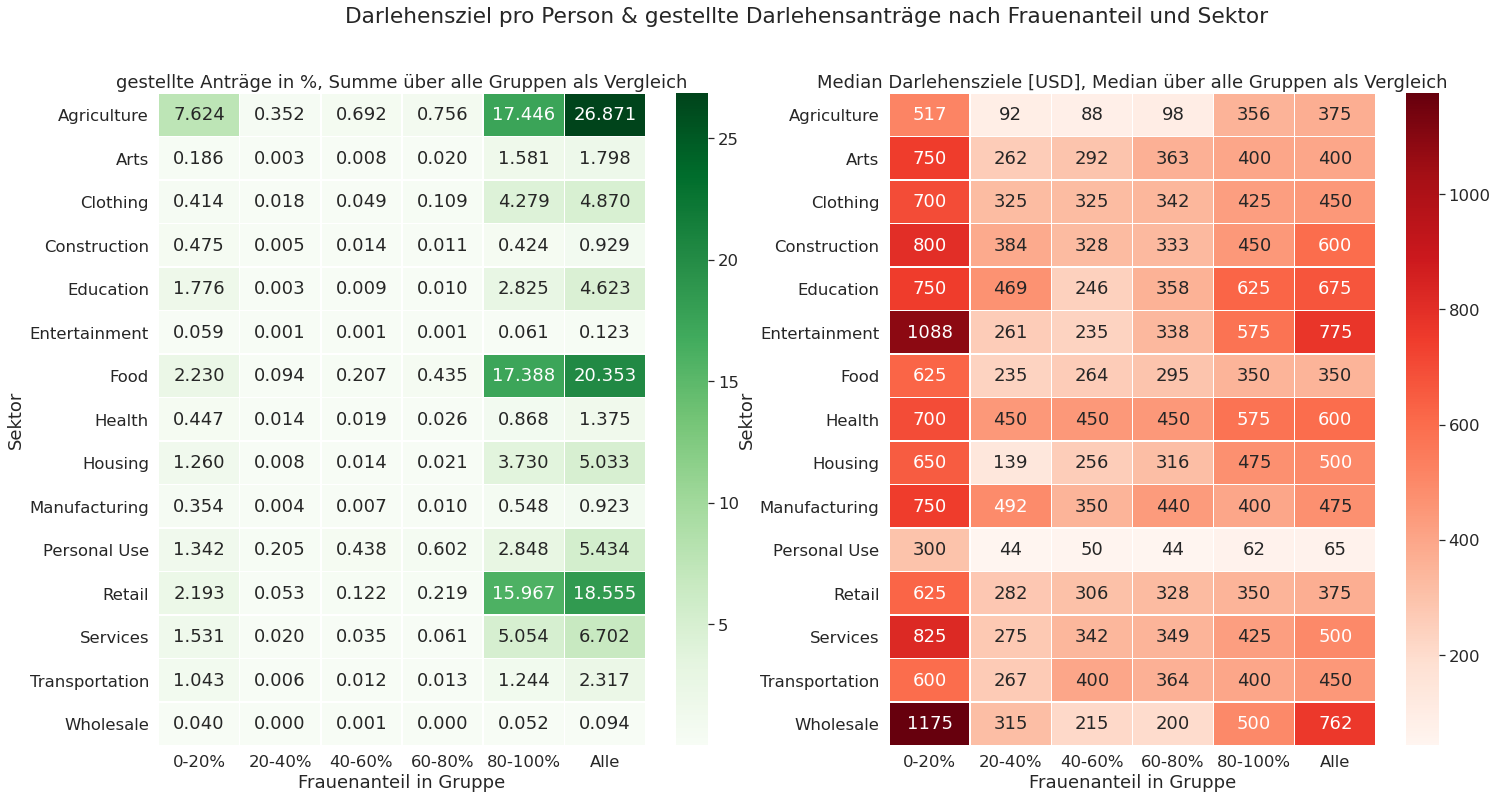

In [39]:
# Heatmap zeichnen mit Zahlwerten in den Zellen
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(24, 12))
heat1 = sns.heatmap(data=df_per_person_pivot, #Data
                   annot=True, #Zahlwerte in Zellen?
                   fmt="0.0f", #Format der Zahlen
                   linewidths=.5, #Liniendicke zwischen Zellen
                   cmap="Reds", #Farbpalette
                   #center=True,
                   ax=ax[1])

#Eigenschaften ändern
heat1.set(xlabel="Frauenanteil in Gruppe", #Bezeichnung x-Achse
        ylabel="Sektor", #Bezeichnung y-Achse
        title='Median Darlehensziele [USD], Median über alle Gruppen als Vergleich'); #Titel

heat2 = sns.heatmap(data=df_per_person_pivot_size, #Data
                   annot=True, #Zahlwerte in Zellen?
                   fmt="0.3f", #Format der Zahlen
                   linewidths=.5, #Liniendicke zwischen Zellen
                   cmap="Greens", #Farbpalette
                   #center=True,
                   ax=ax[0])

#Eigenschaften ändern
heat2.set(xlabel="Frauenanteil in Gruppe", #Bezeichnung x-Achse
        ylabel="Sektor", #Bezeichnung y-Achse
        title='gestellte Anträge in %, Summe über alle Gruppen als Vergleich'); #Titel
#ax[1].set_yticks([])

#Hauptitel
fig.suptitle('Darlehensziel pro Person & gestellte Darlehensanträge nach Frauenanteil und Sektor');

Erkenntnis:
- Die meisten Anträge werden in den Sektoren Agriculture, Food und Retail gestellt
- Reine Männer und Frauengruppen stellen in denselben Sektoren die meisten Anträge
    - Geschlecht hat kein Einfluss auf Sektor
- Anteil von Frauen und reinen Frauengruppen überwiegt

- Das höchste median Darlehensziel pro Person haben Gruppen mit
    - Frauenanteil 0-20% in Sektor Entertainment (Median 1088 USD)
    - Frauenanteil 0-20% in Sektor Wholesale (Median 1175 USD)
    - Frauenanteil 0-20% in Sektor Services (Median 825 USD)
- Gruppen und Einzelgruppen mit hohem Männeranteil haben pro Person Darlehensziele die deutlich höher sind als die von Frauen. Die Werte liegen über dem Median
- Gruppen und Einzelgruppen mit hohem Frauenanteil haben pro Person Darlehensziel Werte ähnlich oder kleiner als der Median
- Gemischte Gruppen haben pro Person Darlehensziele unter dem Median
    - Es kann sein, dass Gruppen generell pro Person kleinere Zielwerte haben
- Die niedrigstens Darlehensziele gibt es in Sektoren
    - Personal Use (Median 65 USD pro Person)
    - Food (Median 350 USD)
    - Retail und Agriculture (Median 375 USD)
<br><br>
- Es werden hier Gruppen und Einzelpersonen zusammen betrachtet
    - Gruppen weisen pro Person kleinere Darlehensziele auf
- Vergleich wird dadurch schwierig
- Interessant wäre es Einzelpersonen aus der Betrachtung rauszunehmen

## Zusatz

In [27]:
#Nach sector und Frauenanteil gruppieren, median von loan_amount nutzen
df_grouped_pivot = df_gender.groupby(["sector", "female_percent_category"],as_index=False).agg({"loan_amount":"median"})

In [28]:
#Pivottabelle
df_grouped_pivot = df_grouped_pivot.pivot("sector", "female_percent_category", "loan_amount")

In [29]:
df_grouped_pivot.head(3)

female_percent_category,0-20%,20-40%,40-60%,60-80%,80-100%
sector,,,,,
Agriculture,575.0,925.0,800.0,950.0,450.0
Arts,775.0,1275.0,1050.0,3300.0,450.0
Clothing,750.0,2550.0,2625.0,2712.5,575.0


In [30]:
#Spalte Alle für ganzen Sector hinzufügen
#Hier als Kategorie hinzufügen
df_grouped_pivot.columns = df_grouped_pivot.columns.add_categories("Alle")

#Median für jeden Sektor einzeln bestimmten
for sector in df_gender["sector"].unique():
    median = df_gender.loc[df_gender["sector"] == sector, "loan_amount"].median()
    df_grouped_pivot.loc[sector, "Alle"] = median
    
df_grouped_pivot.head(5)

female_percent_category,0-20%,20-40%,40-60%,60-80%,80-100%,Alle
sector,,,,,,
Agriculture,575.0,925.0,800.0,950.0,450.0,500.0
Arts,775.0,1275.0,1050.0,3300.0,450.0,475.0
Clothing,750.0,2550.0,2625.0,2712.5,575.0,600.0
Construction,825.0,3050.0,2100.0,2925.0,500.0,700.0
Education,750.0,2800.0,1912.5,2925.0,675.0,725.0


In [31]:
#Die Anzahl der Anträge gruppieren, nach Sektor und Frauenanteil
df_grouped_pivot_size = df_gender.groupby(["sector", "female_percent_category"],as_index=False).size()
df_grouped_pivot_size.head(3)

,sector,female_percent_category,size
0,Agriculture,0-20%,50854
1,Agriculture,20-40%,2349
2,Agriculture,40-60%,4616


In [32]:
#Anzahl in Prozent umrechnen
df_grouped_pivot_size["size"] = 100 * df_grouped_pivot_size["size"] / df_grouped_pivot_size["size"].sum()

In [33]:
df_grouped_pivot_size = df_grouped_pivot_size.pivot("sector", "female_percent_category", "size")

In [34]:
df_grouped_pivot_size.head(3)

female_percent_category,0-20%,20-40%,40-60%,60-80%,80-100%
sector,,,,,
Agriculture,7.624471,0.352182,0.692071,0.756240,17.445846
Arts,0.185912,0.003298,0.008396,0.019791,1.580848
Clothing,0.414253,0.017542,0.049027,0.109448,4.279413


In [35]:
#Spalte Alle für ganzen Sector hinzufügen
#Hier als Kategorie hinzufügen
df_grouped_pivot_size.columns = df_grouped_pivot_size.columns.add_categories("Alle")

#Summe für jeden Sektor einzeln bestimmten
for sector in df_gender["sector"].unique():
    summe = df_grouped_pivot_size.loc[sector].sum()
    df_grouped_pivot_size.loc[sector, "Alle"] = summe
    
df_grouped_pivot_size.head(5)

female_percent_category,0-20%,20-40%,40-60%,60-80%,80-100%,Alle
sector,,,,,,
Agriculture,7.624471,0.352182,0.692071,0.756240,17.445846,26.870809
Arts,0.185912,0.003298,0.008396,0.019791,1.580848,1.798244
Clothing,0.414253,0.017542,0.049027,0.109448,4.279413,4.869682
Construction,0.474974,0.005397,0.013644,0.010645,0.423998,0.928658
Education,1.775605,0.003448,0.008996,0.010045,2.825255,4.623349


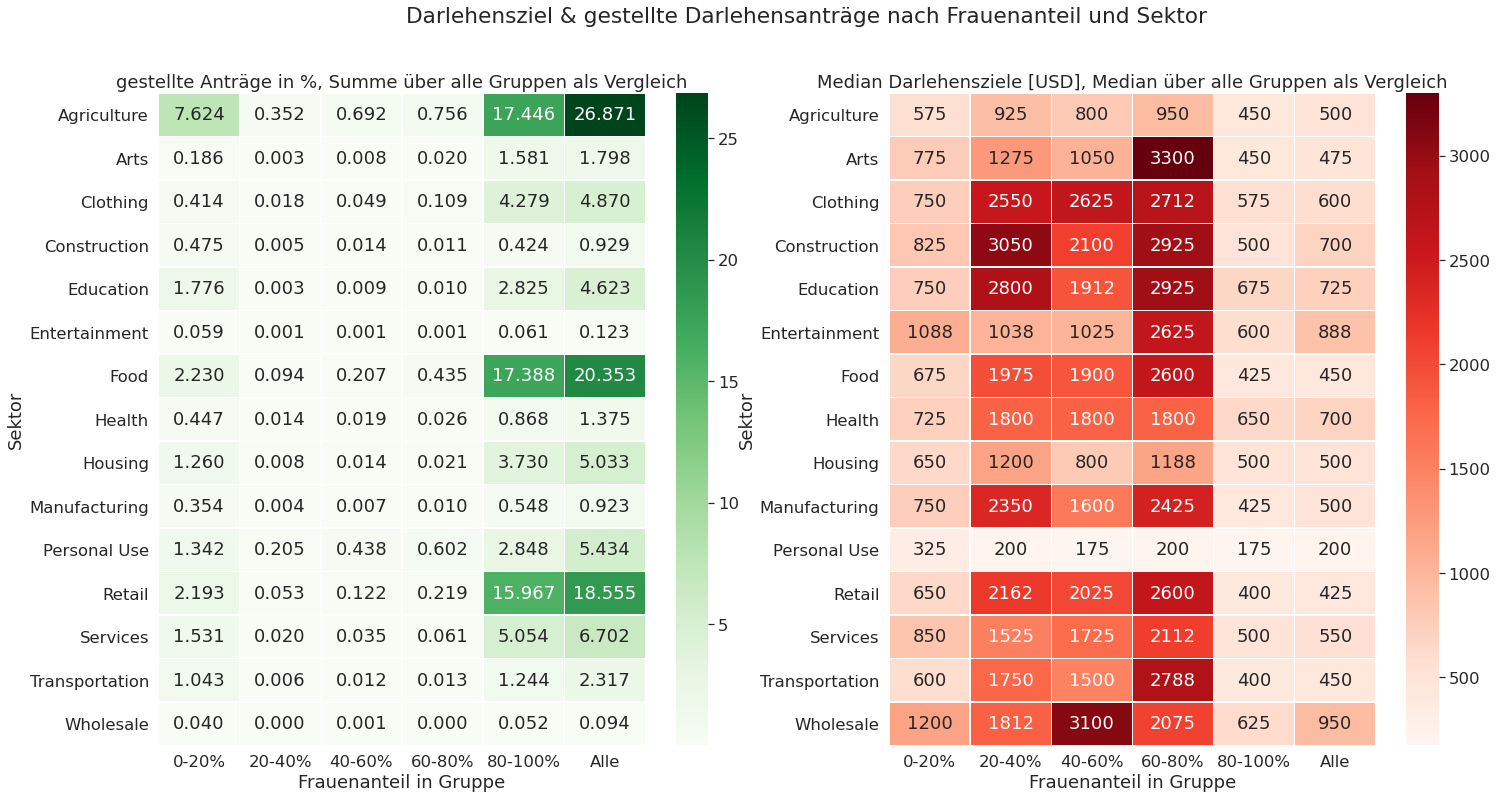

In [36]:
# Heatmap zeichnen mit Zahlwerten in den Zellen
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(24, 12))
heat1 = sns.heatmap(data=df_grouped_pivot, #Data
                   annot=True, #Zahlwerte in Zellen?
                   fmt="0.0f", #Format der Zahlen
                   linewidths=.5, #Liniendicke zwischen Zellen
                   cmap="Reds", #Farbpalette
                   #center=True,
                   ax=ax[1])

#Eigenschaften ändern
heat1.set(xlabel="Frauenanteil in Gruppe", #Bezeichnung x-Achse
        ylabel="Sektor", #Bezeichnung y-Achse
        title='Median Darlehensziele [USD], Median über alle Gruppen als Vergleich'); #Titel

heat2 = sns.heatmap(data=df_grouped_pivot_size, #Data
                   annot=True, #Zahlwerte in Zellen?
                   fmt="0.3f", #Format der Zahlen
                   linewidths=.5, #Liniendicke zwischen Zellen
                   cmap="Greens", #Farbpalette
                   #center=True,
                   ax=ax[0])

#Eigenschaften ändern
heat2.set(xlabel="Frauenanteil in Gruppe", #Bezeichnung x-Achse
        ylabel="Sektor", #Bezeichnung y-Achse
        title='gestellte Anträge in %, Summe über alle Gruppen als Vergleich'); #Titel
#ax[1].set_yticks([])

#Hauptitel
fig.suptitle('Darlehensziel & gestellte Darlehensanträge nach Frauenanteil und Sektor');

## Mixed Gruppen

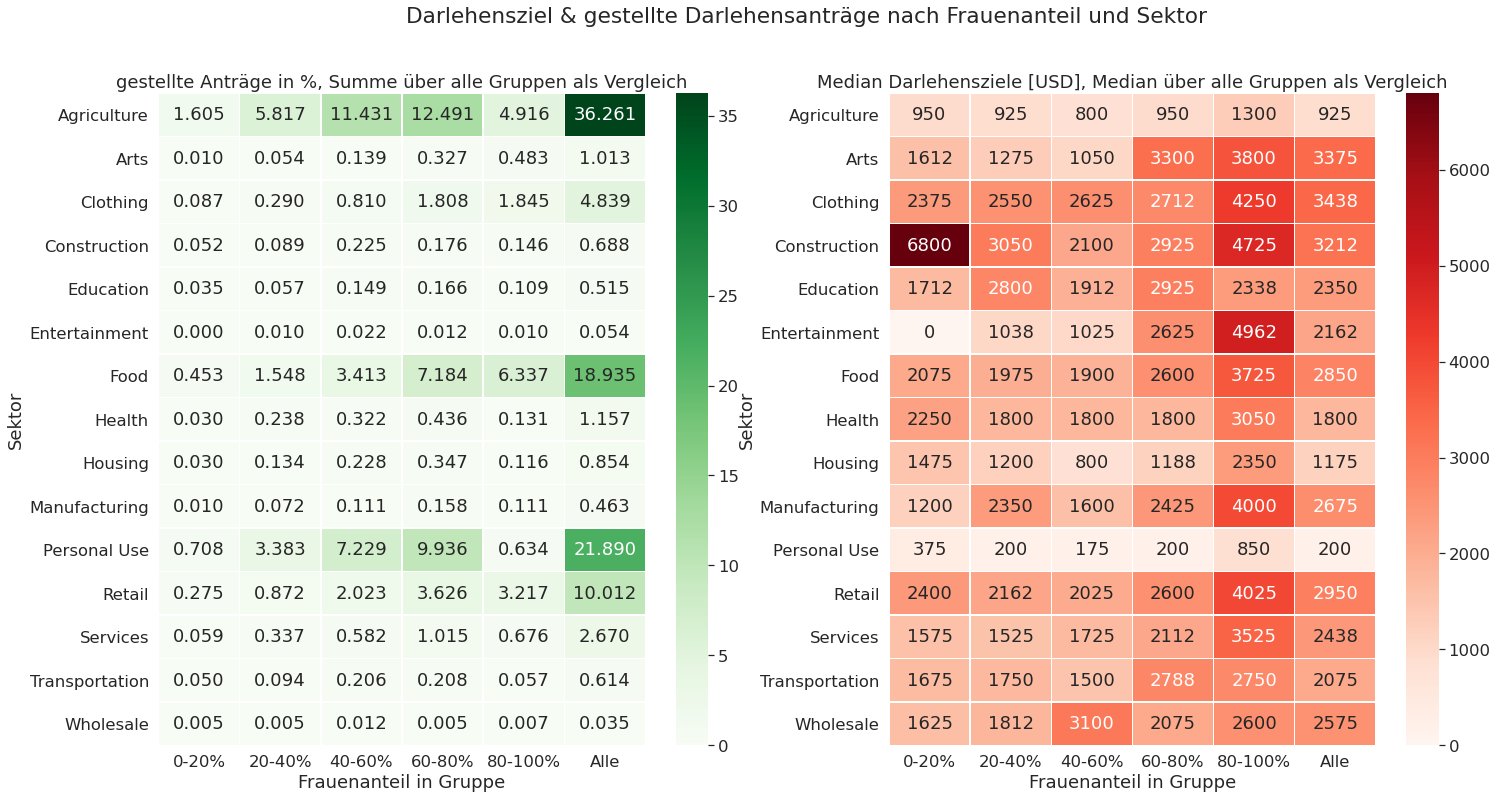

In [82]:
#Nach sector und Frauenanteil gruppieren, median von loan_amount nutzen
df_mixed_pivot = df_mixed.groupby(["sector", "female_percent_category"]).agg({"loan_amount":"median"})
df_mixed_pivot["loan_amount"].fillna(0, inplace=True)
df_mixed_pivot.reset_index(inplace=True)
#Pivottabelle
df_mixed_pivot = df_mixed_pivot.pivot("sector", "female_percent_category", "loan_amount")
#Spalte Alle für ganzen Sector hinzufügen
#Hier als Kategorie hinzufügen
df_mixed_pivot.columns = df_mixed_pivot.columns.add_categories("Alle")

#Median für jeden Sektor einzeln bestimmten
for sector in df_mixed["sector"].unique():
    median = df_mixed.loc[df_mixed["sector"] == sector, "loan_amount"].median()
    df_mixed_pivot.loc[sector, "Alle"] = median
    
#Anzahl der Antragssteller in Prozent nach Frauenanteil und Sektor
df_mixed_size_pivot = df_mixed.groupby(["sector", "female_percent_category"],as_index=False).size()
df_mixed_size_pivot["size"] = 100 * df_mixed_size_pivot["size"] / df_mixed_size_pivot["size"].sum()
df_mixed_size_pivot = df_mixed_size_pivot.pivot("sector", "female_percent_category", "size")


#Spalte Alle für ganzen Sector hinzufügen
#Hier als Kategorie hinzufügen
df_mixed_size_pivot.columns = df_mixed_size_pivot.columns.add_categories("Alle")

#Summe für jeden Sektor einzeln bestimmten
for sector in df_mixed["sector"].unique():
    summe = df_mixed_size_pivot.loc[sector].sum()
    df_mixed_size_pivot.loc[sector, "Alle"] = summe
    
# Heatmap zeichnen mit Zahlwerten in den Zellen
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(24, 12))
heat1 = sns.heatmap(data=df_mixed_pivot, #Data
                   annot=True, #Zahlwerte in Zellen?
                   fmt="0.0f", #Format der Zahlen
                   linewidths=.5, #Liniendicke zwischen Zellen
                   cmap="Reds", #Farbpalette
                   #center=True,
                   ax=ax[1])

#Eigenschaften ändern
heat1.set(xlabel="Frauenanteil in Gruppe", #Bezeichnung x-Achse
        ylabel="Sektor", #Bezeichnung y-Achse
        title='Median Darlehensziele [USD], Median über alle Gruppen als Vergleich'); #Titel

heat2 = sns.heatmap(data=df_mixed_size_pivot, #Data
                   annot=True, #Zahlwerte in Zellen?
                   fmt="0.3f", #Format der Zahlen
                   linewidths=.5, #Liniendicke zwischen Zellen
                   cmap="Greens", #Farbpalette
                   #center=True,
                   ax=ax[0])

#Eigenschaften ändern
heat2.set(xlabel="Frauenanteil in Gruppe", #Bezeichnung x-Achse
        ylabel="Sektor", #Bezeichnung y-Achse
        title='gestellte Anträge in %, Summe über alle Gruppen als Vergleich'); #Titel
#ax[1].set_yticks([])

#Hauptitel
fig.suptitle('Darlehensziel & gestellte Darlehensanträge nach Frauenanteil und Sektor in gemischten Gruppen');